In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

In [3]:
test_image = cv2.imread('Paint_image/logo_drew/tinder_1.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
test_image=255-test_image
test_image = cv2.resize(test_image, (8, 8))

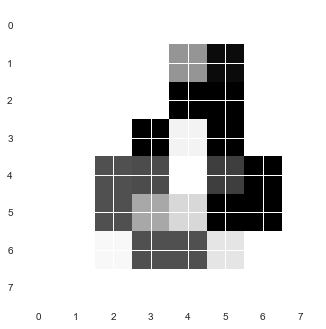

In [4]:
plt.imshow(test_image)

In [5]:
test_image 

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 128, 245,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255,  24, 255,   0,   0],
       [  0,   0, 192, 195,   0, 205, 255,   0],
       [  0,   0, 192, 112,  64, 255, 255,   0],
       [  0,   0,  14, 192, 192,  46,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

Il faut créer une base de données 

On veut créer de la manière : ['data', 'target', 'target_names', 'images']

Liste ou numpy ? voire un dico ..

https://docs.python.org/3/library/glob.html


In [7]:
%%time
from glob import glob
import os

imPath = "Paint_image/logo_drew/"
ls_path = glob(os.path.join(imPath, '*' ))

ls_path


name_to_label ={'tinder':1,'messenger':2} #Pour labeliser facilement
data_base={'data': [], 'label' : [],'nom_label' :[],'image':[]}
for file in ls_path:                        #On parcours tous les fichiers                
    im = cv2.imread(file,0)                 #On charge l'image
    im=255-im                               #On inverse le contrast 
    im = cv2.resize(im, (8, 8))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    data_base['data']+=[np.ndarray.flatten(im)]
    data_base['label']+=[name_to_label[name]]
    data_base['nom_label']+=[name]
    data_base['image']+=[im]
data_base['data']=np.array(data_base['data'])
data_base['label']=np.array(data_base['label'])
data_base['nom_label']=np.array(data_base['nom_label'])
data_base['image']=np.array(data_base['image'])
    


Wall time: 122 ms


In [8]:
data_base['data'][1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       203,  66,   0,   0,   0,   0,  70, 255, 255, 192,   0,   0,   0,
         0, 255,   0,  64, 192,   0,   0,   0,  58, 235,   0,  64, 192,
       183,   0,   0,   0,   0,   0, 255,  40, 255,   0,   0,   0,   0,
         0, 255, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0],
      dtype=uint8)

# We try some ML

In [9]:
from sklearn.ensemble import RandomForestClassifier


C:\Users\Delanoue\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
from sklearn.cross_validation import train_test_split

logo_data=data_base['data']
logo_target=data_base['label']

Xtrain, Xtest, ytrain, ytest = train_test_split(logo_data, logo_target, test_size=0.1,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

C:\Users\Delanoue\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          1       0.50      1.00      0.67         1
          2       1.00      0.80      0.89         5

avg / total       0.92      0.83      0.85         6



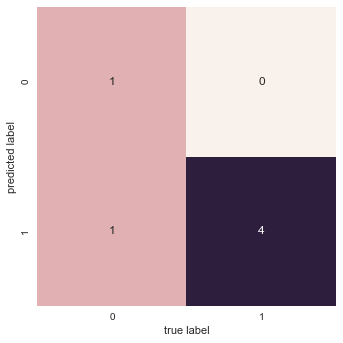

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');